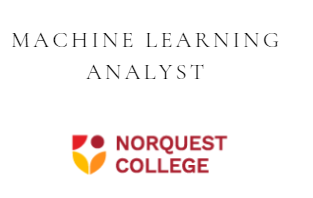

### Assignment: Machine Learning Model Training and Evaluation

**Objective:**  
In this assignment, you will use the **Machine Learning notebook** from last year's project as a starting point. Your goal is to retrain the model using the **2023 Food Drive data** for training and then use the **2024 Food Drive data** as the test set to evaluate the model’s accuracy and effectiveness. You will compare the predictions with the actual results from 2024 and assess the model's performance.

---

### Steps:

1. **Review the ML Notebook**
   - Start by reviewing the Machine Learning notebook provided from last year. Understand the model architecture, feature selection, and data preprocessing steps.
   - Ensure you understand the model’s objective and how predictions were generated for donation volumes, volunteer allocation, or other key metrics.

2. **Data Preparation**
   - **Load the 2023 data** as the training dataset and ensure that the data is cleaned and preprocessed in a way that matches last year's model requirements (feature scaling, missing value handling, etc.).
   - **Load the 2024 data** as the test dataset. Make sure that the test dataset is structured in the same format as the training data, ensuring consistency in features.

3. **Model Training**
   - Using the 2023 data, retrain the model provided in the notebook. Ensure that the parameters, features, and settings used in last year’s notebook are maintained unless you choose to optimize them.
   - Record the model's **training performance metrics**, such as accuracy, loss, or other relevant evaluation metrics based on your model (e.g., RMSE, MAE, precision).

4. **Model Testing**
   - Once the model is trained, use the 2024 data as the **test set**.
   - Generate predictions using the model and compare them to the actual results from the 2024 food drive.
   - Record the model’s **test performance metrics** and compare them to the training metrics.

5. **Accuracy and Performance Analysis**
   - Evaluate the **accuracy** of the model's predictions by comparing them to the actual outcomes from the 2024 data.
   - Use relevant evaluation metrics (e.g., accuracy, precision, recall, F1 score, MAE, RMSE, etc.) to measure the model's performance.
   - Identify **any discrepancies** between the predictions and actual outcomes. Are there any trends or patterns where the model performed well or poorly?





# Load data and run previous EDA

# Modelling

Predicting the **number of donation bags collected** is a regression problem, and there are several regression models you can use in addition to Linear Regression. Here are some commonly used regression models:

Ridge Regression and Lasso Regression: These are extensions of Linear Regression that add regularization to the model to prevent overfitting. Ridge regression uses L2 regularization, and Lasso regression uses L1 regularization.

Support Vector Regression (SVR): SVR is a regression technique that extends Support Vector Machines (SVM) to regression problems. It is particularly useful when dealing with non-linear relationships.

ElasticNet Regression: ElasticNet combines L1 and L2 regularization, offering a balance between Ridge and Lasso regression. It can handle cases where some features are irrelevant or redundant.

Polynomial Regression: Polynomial regression allows you to capture non-linear relationships by introducing polynomial features. It's suitable when the relationship between the input features and the target variable is curvilinear.

Random Forest Regression: Random Forest can also be used for regression tasks. It combines multiple decision trees to provide robust predictions.

Gradient Boosting Regressors: Algorithms like XGBoost, LightGBM, and CatBoost have regression variants. They are powerful and often provide state-of-the-art performance for regression tasks.

K-Nearest Neighbors (KNN) Regression: KNN can be adapted for regression by predicting the target variable as the average or weighted average of the K nearest neighbors' target values.

Neural Networks (Deep Learning): You can use deep learning models, such as feedforward neural networks, to perform regression tasks. Neural networks can capture complex relationships in the data.

Gaussian Process Regression: Gaussian process regression is a probabilistic approach that models the target variable as a distribution, providing uncertainty estimates along with predictions.

Decision Tree Regression: Decision trees can be used for regression as well as classification. They partition the data and predict the target variable as the average of the target values in each leaf node.

Bayesian Regression: Bayesian regression models incorporate Bayesian techniques to estimate model parameters and provide uncertainty estimates in predictions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#read csv files

data_train = pd.read_csv('Food_Drive_2023.csv')
data_test = pd.read_csv('Food_Drive_2024.csv')

In [3]:
print(data_train.head())


                  Date              Location              Stake  \
0  2023-09-23 10:36:10    Londonderry Chapel  Bonnie Doon Stake   
1  2023-09-23 10:36:52  Gateway Stake Centre      Gateway Stake   
2  2023-09-23 10:40:22  Gateway Stake Centre      Gateway Stake   
3  2023-09-23 10:41:08  Gateway Stake Centre      Gateway Stake   
4  2023-09-23 10:44:10    Londonderry Chapel  Bonnie Doon Stake   

            Ward/Branch  # of Adult Volunteers  # of Youth Volunteers  \
0        Clareview Ward                      1                      3   
1  Crawford Plains Ward                      3                      1   
2     Silver Berry Ward                      2                      0   
3  Crawford Plains Ward                      2                      0   
4      Londonderry Ward                      1                      0   

   Donation Bags Collected  Time to Complete (min)  \
0                       14                    25.0   
1                       18                    25.0

In [4]:
print(data_test.head())

   ï»¿ID        Start time   Completion time                  Location  \
0     25  2024-09-28 10:01  2024-09-28 10:05        Londonberry Chapel   
1     26  2024-09-28 10:31  2024-09-28 10:34     Gateway Stake Centre    
2     27  2024-09-28 10:33  2024-09-28 10:36  Bonnie Doon Stake Centre   
3     28  2024-09-28 10:41  2024-09-28 10:43           Bearspaw Chapel   
4     29  2024-09-28 10:36  2024-09-28 10:45     Gateway Stake Centre    

           Ward/Branch              Stake       Route  \
0       Clareview Ward  Bonnie Doon Stake  Unassigned   
1       Lee Ridge Ward      Gateway Stake          50   
2  Forest Heights Ward  Bonnie Doon Stake          98   
3       Lee Ridge Ward      Gateway Stake           6   
4    Silver Berry Ward      Gateway Stake          19   

  Time Spent Collecting Donations  # of Adult Volunteers  \
0                  0 - 30 Minutes                      1   
1                  0 - 30 Minutes                      2   
2                  0 - 30 Minute

# Team Tasks

# Solution 1: Compare the no of routes per ward & no. of routes per stake


In [6]:
# Grouping data by 'Ward' and 'Stake' to get counts of routes
routes_per_ward_2023 = data_train.groupby('Ward')['Routes Completed'].count().reset_index(name='Number of Routes')
routes_per_ward_2024 = data_test.groupby('Ward')['Routes Completed'].count().reset_index(name='Number of Routes')

routes_per_stake_2023 = data_train.groupby('Stake')['Routes Completed'].count().reset_index(name='Number of Routes')
routes_per_stake_2024 = data_test.groupby('Stake')['Routes Completed'].count().reset_index(name='Number of Routes')

# One-hot encode categorical variables ('Ward' and 'Stake')
X_ward_train = pd.get_dummies(routes_per_ward_2023[['Ward']])
y_ward_train = routes_per_ward_2023['Number of Routes']

X_ward_test = pd.get_dummies(routes_per_ward_2024[['Ward']])
y_ward_test = routes_per_ward_2024['Number of Routes']

X_stake_train = pd.get_dummies(routes_per_stake_2023[['Stake']])
y_stake_train = routes_per_stake_2023['Number of Routes']

X_stake_test = pd.get_dummies(routes_per_stake_2024[['Stake']])
y_stake_test = routes_per_stake_2024['Number of Routes']

# Align train and test sets to make sure they have the same columns (handling dummy variable differences)
X_ward_train, X_ward_test = X_ward_train.align(X_ward_test, join='left', axis=1, fill_value=0)
X_stake_train, X_stake_test = X_stake_train.align(X_stake_test, join='left', axis=1, fill_value=0)
routes_per_ward_2023

,Ward,Number of Routes
0,Anirniq Ward,34
1,Ipiihkoohkanipiaohtsi Ward,45
2,Karhiio Ward,73
3,MÃ©tis Ward,20
4,Sspomitapi Ward,85
5,papastew Ward,15


from matplotlib import pyplot as plt
routes_per_ward_2023['Number of Routes'].plot(kind='hist', bins=20, title='Number of Routes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
routes_per_ward_2023.groupby('Ward').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
routes_per_ward_2023['Number of Routes'].plot(kind='line', figsize=(8, 4), title='Number of Routes')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(routes_per_ward_2023['Ward'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(routes_per_ward_2023, x='Number of Routes', y='Ward', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [8]:
routes_per_ward_2024

,Ward,Number of Routes
0,Anirniq Ward,24
1,Ipiihkoohkanipiaohtsi Ward,49
2,Karhiio Ward,62
3,MÃ©tis Ward,20
4,Sspomitapi Ward,63
5,papastew Ward,21


In [9]:
# prompt: Using dataframe routes_per_ward_2024: save as csv

# Save the DataFrame to a CSV file named 'routes_per_ward_2024.csv'
routes_per_ward_2024.to_csv('routes_per_ward_2024.csv', index=False)


In [7]:
# prompt: Using dataframe routes_per_ward_2023: save as csv

# Save the DataFrame to a CSV file named 'routes_per_ward_2023.csv'
routes_per_ward_2023.to_csv('routes_per_ward_2023.csv', index=False) # index=False prevents writing row indices to the file


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Number of Routes per Ward
model_ward = LinearRegression()
model_ward.fit(X_ward_train, y_ward_train)
y_ward_pred = model_ward.predict(X_ward_test)

# Evaluate the model for ward prediction
mse_ward = mean_squared_error(y_ward_test, y_ward_pred)
r2_ward = r2_score(y_ward_test, y_ward_pred)
print(f"Number of Routes per Ward - Mean Squared Error: {mse_ward}")
print(f"Number of Routes per Ward - R-squared (R²): {r2_ward}\n")

# 2. Number of Routes per Stake
model_stake = LinearRegression()
model_stake.fit(X_stake_train, y_stake_train)
y_stake_pred = model_stake.predict(X_stake_test)

# Evaluate the model for stake prediction
mse_stake = mean_squared_error(y_stake_test, y_stake_pred)
r2_stake = r2_score(y_stake_test, y_stake_pred)
print(f"Number of Routes per Stake - Mean Squared Error: {mse_stake}")
print(f"Number of Routes per Stake - R-squared (R²): {r2_stake}\n")

Number of Routes per Ward - Mean Squared Error: 126.16666666666664
Number of Routes per Ward - R-squared (R²): 0.6413738649822345

Number of Routes per Stake - Mean Squared Error: 439.19999999999936
Number of Routes per Stake - R-squared (R²): 0.8717649257217605



# Compare with other Regressor Models

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:

# Standardize features (required for KNN)
# Standardize the features for Ward prediction (required for KNN)
scaler_ward = StandardScaler()
X_ward_train_scaled = scaler_ward.fit_transform(X_ward_train)
X_ward_test_scaled = scaler_ward.transform(X_ward_test)

# Standardize the features for Stake prediction (required for KNN)
scaler_stake = StandardScaler()
X_stake_train_scaled = scaler_stake.fit_transform(X_stake_train)
X_stake_test_scaled = scaler_stake.transform(X_stake_test)

In [14]:
# Implement Decision Tree Regression for Ward Prediction
decision_tree = DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_ward_train_scaled, y_ward_train)
y_pred_decision_tree_ward = decision_tree.predict(X_ward_test_scaled)

# Implement K-Nearest Neighbors (KNN) Regression for Ward Prediction
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_ward_train_scaled, y_ward_train)
y_pred_knn_ward = knn.predict(X_ward_test_scaled)

# Implement Random Forest Regression for Ward Prediction
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_ward_train_scaled, y_ward_train)
y_pred_random_forest_ward = random_forest.predict(X_ward_test_scaled)

# Implement Gradient Boosting Regression for Ward Prediction
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
gradient_boosting.fit(X_ward_train_scaled, y_ward_train)
y_pred_gradient_boosting_ward = gradient_boosting.predict(X_ward_test_scaled)

# Evaluate the models for Ward Prediction
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - R-squared (R²): {r2}\n")

print("Comparison for Number of Routes per Neighburhood:\n")
evaluate_model(y_ward_test, y_pred_decision_tree_ward, "Decision Tree")
evaluate_model(y_ward_test, y_pred_knn_ward, "K-Nearest Neighbors (KNN)")
evaluate_model(y_ward_test, y_pred_random_forest_ward, "Random Forest")
evaluate_model(y_ward_test, y_pred_gradient_boosting_ward, "Gradient Boosting")

Comparison for Number of Routes per Neighburhood:

Decision Tree - Mean Squared Error: 126.16666666666667
Decision Tree - R-squared (R²): 0.6413738649822345

K-Nearest Neighbors (KNN) - Mean Squared Error: 270.9266666666667
K-Nearest Neighbors (KNN) - R-squared (R²): 0.22989656533754432

Random Forest - Mean Squared Error: 62.493533333333296
Random Forest - R-squared (R²): 0.82236342676668

Gradient Boosting - Mean Squared Error: 126.10752410451754
Gradient Boosting - R-squared (R²): 0.6415419764893303



In [15]:
# Implement Decision Tree Regression for Stake Prediction
decision_tree.fit(X_stake_train_scaled, y_stake_train)
y_pred_decision_tree_stake = decision_tree.predict(X_stake_test_scaled)

# Implement K-Nearest Neighbors (KNN) Regression for Stake Prediction
knn.fit(X_stake_train_scaled, y_stake_train)
y_pred_knn_stake = knn.predict(X_stake_test_scaled)

# Implement Random Forest Regression for Stake Prediction
random_forest.fit(X_stake_train_scaled, y_stake_train)
y_pred_random_forest_stake = random_forest.predict(X_stake_test_scaled)

# Implement Gradient Boosting Regression for Stake Prediction
gradient_boosting.fit(X_stake_train_scaled, y_stake_train)
y_pred_gradient_boosting_stake = gradient_boosting.predict(X_stake_test_scaled)

# Evaluate the models for Stake Prediction
print("Comparison for Number of Routes per Neighborhood:\n")
evaluate_model(y_stake_test, y_pred_decision_tree_stake, "Decision Tree")
evaluate_model(y_stake_test, y_pred_knn_stake, "K-Nearest Neighbors (KNN)")
evaluate_model(y_stake_test, y_pred_random_forest_stake, "Random Forest")
evaluate_model(y_stake_test, y_pred_gradient_boosting_stake, "Gradient Boosting")

Comparison for Number of Routes per Neighborhood:

Decision Tree - Mean Squared Error: 439.2
Decision Tree - R-squared (R²): 0.8717649257217603

K-Nearest Neighbors (KNN) - Mean Squared Error: 3426.4
K-Nearest Neighbors (KNN) - R-squared (R²): -0.0004204428664857929

Random Forest - Mean Squared Error: 624.89658
Random Forest - R-squared (R²): 0.8175463129496403

Gradient Boosting - Mean Squared Error: 439.16303198548275
Gradient Boosting - R-squared (R²): 0.8717757194286991



# Solution 2: Compare no of bags collected per route

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd

# Step 1: Prepare the data - group by 'Ward' and calculate bags per route
train_data = data_train.groupby('Ward').agg(
    Total_Bags_Collected=('Donation Bags Collected', 'sum'),
    Total_Routes=('Routes Completed', 'sum')
).reset_index()
train_data['Bags_Per_Route'] = train_data['Total_Bags_Collected'] / train_data['Total_Routes']

test_data = data_test.groupby('Ward').agg(
    Total_Bags_Collected=('Donation Bags Collected', 'sum'),
    Total_Routes=('Routes Completed', 'sum')
).reset_index()
test_data['Bags_Per_Route'] = test_data['Total_Bags_Collected'] / test_data['Total_Routes']

# Step 2: One-hot encode categorical variables
X_train = pd.get_dummies(train_data[['Ward']])
y_train = train_data['Bags_Per_Route']

X_test = pd.get_dummies(test_data[['Ward']])
y_test = test_data['Bags_Per_Route']

# Align columns to make sure training and test data have the same feature set
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Step 3: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Predicted Bags per Route for 2024:", y_pred)


Mean Absolute Error: 11.000895654540342
Root Mean Squared Error: 12.1553822497027
Predicted Bags per Route for 2024: [13.05263158 13.95555556 13.79452055 11.4        13.51336898 20.43333333]


### Compare with other models


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
# Decision Tree Regression
decision_tree = DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train_scaled, y_train)
y_pred_decision_tree = decision_tree.predict(X_test_scaled)

# K-Nearest Neighbors (KNN) Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Random Forest Regression
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train_scaled, y_train)
y_pred_random_forest = random_forest.predict(X_test_scaled)

# Gradient Boosting Regression
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
gradient_boosting.fit(X_train_scaled, y_train)
y_pred_gradient_boosting = gradient_boosting.predict(X_test_scaled)

# Step 5: Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.4f}")
    print(f"{model_name} - R-squared (R²): {r2:.4f}\n")

print("Comparison for Number of Donation Bags Collected per Route:\n")
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")
evaluate_model(y_test, y_pred_random_forest, "Random Forest")
evaluate_model(y_test, y_pred_gradient_boosting, "Gradient Boosting")

Comparison for Number of Donation Bags Collected per Route:

Decision Tree - Mean Squared Error: 147.7533
Decision Tree - R-squared (R²): -1.4643

K-Nearest Neighbors (KNN) - Mean Squared Error: 180.5583
K-Nearest Neighbors (KNN) - R-squared (R²): -2.0114

Random Forest - Mean Squared Error: 161.3388
Random Forest - R-squared (R²): -1.6909

Gradient Boosting - Mean Squared Error: 147.7542
Gradient Boosting - R-squared (R²): -1.4643



*Which model performed best?*

* For predicting the Number of Routes per Ward, Random Forest is the best model.
* For predicting the Number of Routes per Stake, Gradient Boosting is the best model.
* K-Nearest Neighbors (KNN) performed poorly in both scenarios, especially for predicting the routes per stake, as indicated by the negative R².
* Linear Regression, Decision Tree, and Gradient Boosting performed similarly for the "Routes per Stake" prediction, with Gradient Boosting having a slight edge in accuracy.
* Overall, I would choose Random Forest for the "Routes per Ward" prediction and Gradient Boosting for the "Routes per Stake" prediction based on the model performance metrics.



# Solution 2: Convert to a Classification Problem

To do this we can set a threshold for the number of bags collected to determine whether a donation drive is considered successful or not. This threshold can be used to convert your regression task (predicting the number of bags collected) into a classification task (predicting whether the threshold was met or not).

In [19]:
threshold = 50  # Define your threshold here. In this case the Threshold is 50 bags
data_train['Success'] = (data_train['Donation Bags Collected'] >= threshold).astype(int)
data_test['Success'] = (data_test['Donation Bags Collected'] >= threshold).astype(int)


# Check for Data imbalance

In [20]:
import matplotlib.pyplot as plt

# Calculate value counts for the 'Success' column
success_counts_train = data_train['Success'].value_counts()
success_counts_test = data_test['Success'].value_counts()



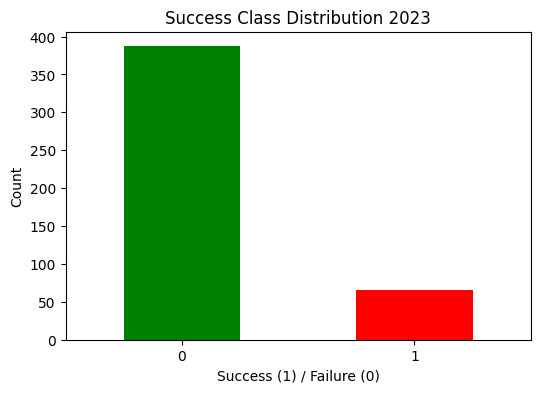

In [21]:
# Plotting the bar plot for 2023 training data
plt.figure(figsize=(6, 4))
success_counts_train.plot(kind='bar', color=['green', 'red'])
plt.title('Success Class Distribution 2023')
plt.xlabel('Success (1) / Failure (0)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

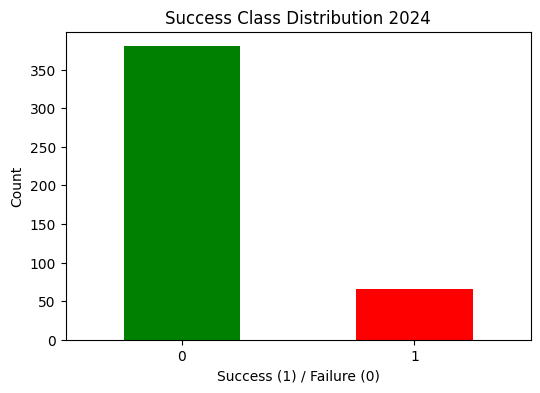

In [22]:
# Plotting the bar plot for 2024 test data
plt.figure(figsize=(6, 4))
success_counts_test.plot(kind='bar', color=['green', 'red'])
plt.title('Success Class Distribution 2024')
plt.xlabel('Success (1) / Failure (0)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Consider reducing your threshold for better balance. Try #40, #30...etc

In [23]:
threshold2 = 30  # Define your threshold here. In this case the Threshold is 50 bags
data_train['Success'] = (data_train['Donation Bags Collected'] >= threshold2).astype(int)
data_test['Success'] = (data_test['Donation Bags Collected'] >= threshold2).astype(int)


In [24]:
# Calculate value counts for the 'Success' column
success_counts_train = data_train['Success'].value_counts()
success_counts_test = data_test['Success'].value_counts()

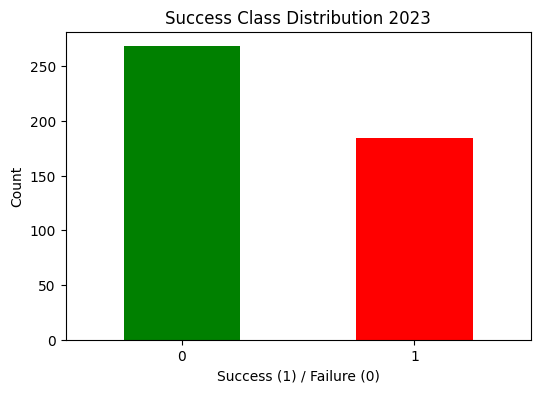

In [25]:
# Plotting the bar plot for 2023 training data
plt.figure(figsize=(6, 4))
success_counts_train.plot(kind='bar', color=['green', 'red'])
plt.title('Success Class Distribution 2023')
plt.xlabel('Success (1) / Failure (0)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

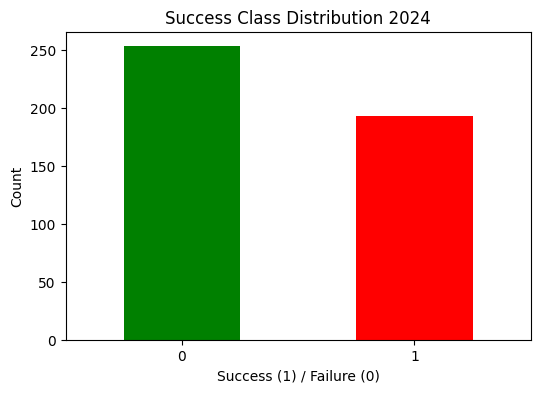

In [26]:
# Plotting the bar plot for 2024 test data
plt.figure(figsize=(6, 4))
success_counts_test.plot(kind='bar', color=['green', 'red'])
plt.title('Success Class Distribution 2024')
plt.xlabel('Success (1) / Failure (0)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [28]:
# Assuming the target variable is in a column named 'Success' (1 for success, 0 for failure)
X = data_train[['Completed More Than One Route','Routes Completed','Time Spent', '# of Adult Volunteers','Doors in Route', '# of Youth Volunteers', 'Time Spent']]
y = data_train['Success']


In [29]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Standardize features (required for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compare Models

In [31]:
# Implement K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Implement Decision Trees
decision_tree = DecisionTreeClassifier(max_depth=5)  # You can adjust the maximum depth
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# Implement Random Forest
random_forest = RandomForestClassifier(n_estimators=100)  # You can adjust the number of trees (n_estimators)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)



In [32]:
# Evaluate the models
print("K-Nearest Neighbors (KNN) Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_decision_tree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_random_forest))



K-Nearest Neighbors (KNN) Accuracy: 0.6703296703296703
Decision Tree Accuracy: 0.7252747252747253
Random Forest Accuracy: 0.7252747252747253


In [33]:
# Optionally, you can print more evaluation metrics like precision, recall, and F1-score
print("\nClassification Report for KNN:")
print(classification_report(y_test, y_pred_knn))




Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74        54
           1       0.62      0.49      0.55        37

    accuracy                           0.67        91
   macro avg       0.66      0.64      0.64        91
weighted avg       0.66      0.67      0.66        91



In [34]:
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_decision_tree))




Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        54
           1       0.69      0.59      0.64        37

    accuracy                           0.73        91
   macro avg       0.72      0.70      0.71        91
weighted avg       0.72      0.73      0.72        91



In [35]:
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_random_forest))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        54
           1       0.67      0.65      0.66        37

    accuracy                           0.73        91
   macro avg       0.72      0.71      0.71        91
weighted avg       0.72      0.73      0.72        91



*Which model performed best?*

**Answer:** The Random Forest model performed best with an accuracy of 76.92%, which is higher than both the K-Nearest Neighbors (67.03%) and Decision Tree (72.53%) models. This suggests that Random Forest may capture the patterns in the data more effectively for this classification problem.

# Save the best performing model

In [36]:
import joblib

#'random_forest_classifier' is your best trained Random Forest Classifier model
model = random_forest  # Replace with your actual model

# Specify the file path where you want to save the model
model_filename = 'random_forest_classifier_model.pkl'

# Save the model to a .pkl file
joblib.dump(model, model_filename)


['random_forest_classifier_model.pkl']

# Determine Feature Importance- Classification Models

Decision Tree

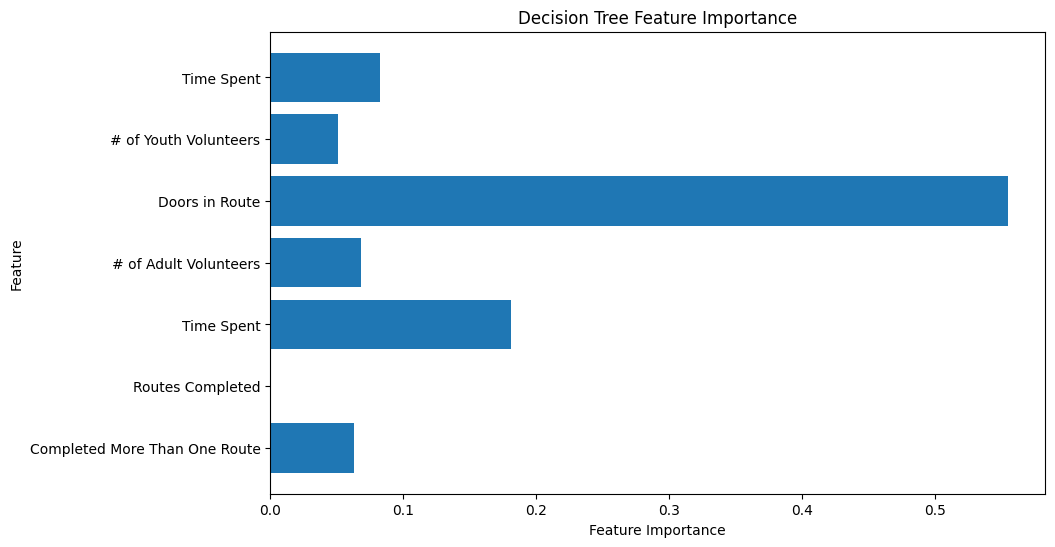

In [37]:

# Assuming 'decision_tree' is your trained Decision Tree model
feature_importance = decision_tree.feature_importances_
feature_names = X.columns

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()


Random Forest

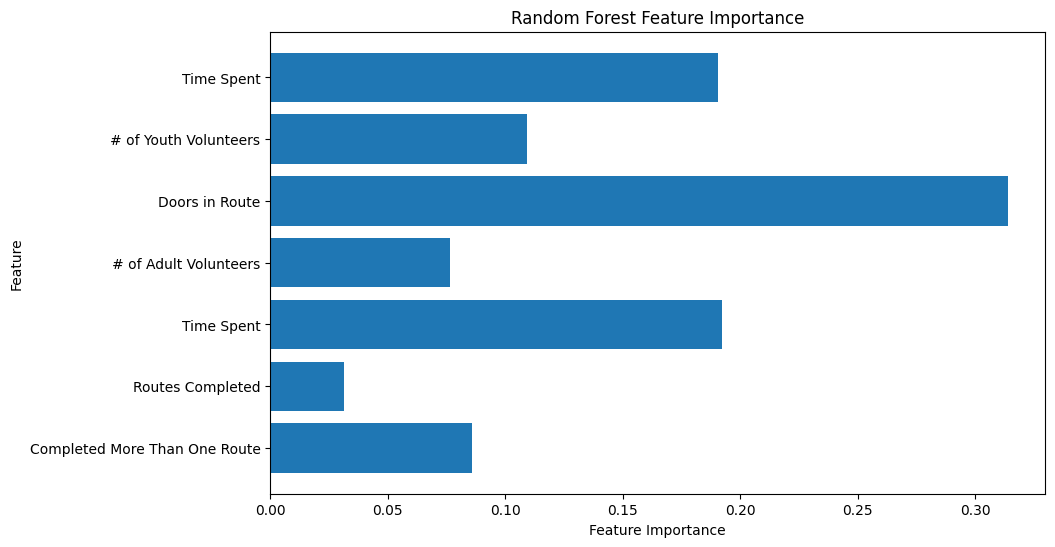

In [38]:

# Assuming 'random_forest' is your trained Random Forest model
feature_importance = random_forest.feature_importances_
feature_names = X.columns

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()


Gradient Boost

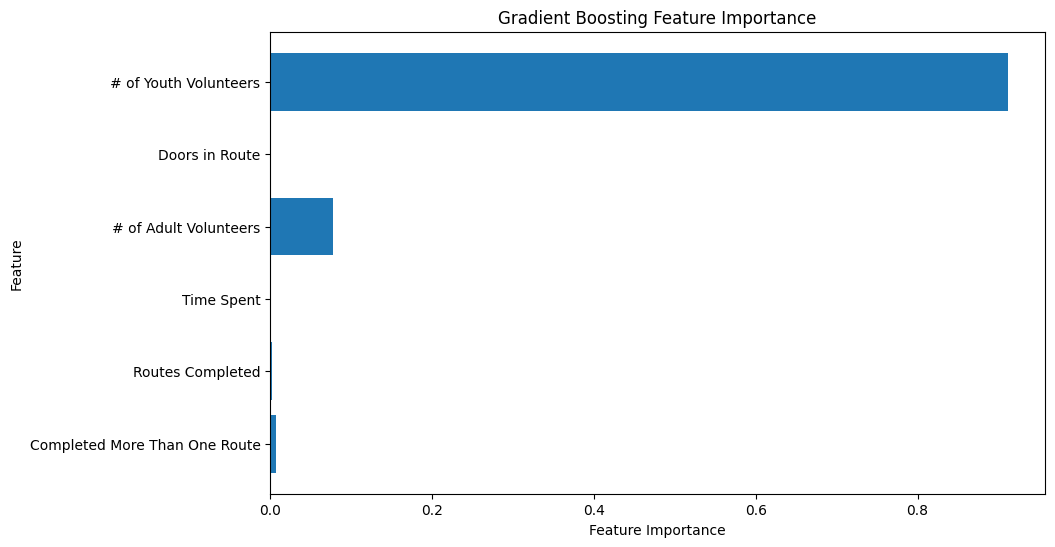

In [39]:

# Assuming 'gradient_boosting' is your trained Gradient Boosting model
feature_importance = gradient_boosting.feature_importances_
# Ensure feature_names matches the features used in the model
feature_names = X.columns[:len(feature_importance)]  # Corrected line

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Feature Importance')
plt.show()

# Lab Assignment (Individual)

1. Predict time spent per Ward/Neighbourhood (2023)
2. Predict Time Spent per Ward?Neighbourhood & Route (2023 & 2024)
3. Create a Threshold and determine Routes that lasted more than 60 minutes to complete
4. Check for data imbalance in your label. What is Data imbalance? What steps can be taken to address Data imbalance.
5. Generate Evaluation reports

In [ ]:
#Answer 1:
# Define feature matrix and target variable
X_ward = data_train[['Routes Completed', '# of Adult Volunteers', '# of Youth Volunteers', 'Doors in Route']]
y_ward = data_train['Time Spent']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_ward_train, X_ward_test, y_ward_train, y_ward_test = train_test_split(X_ward, y_ward, test_size=0.2, random_state=42)

# Train the model (Linear Regression or any other model)
from sklearn.linear_model import LinearRegression
model_ward = LinearRegression()
model_ward.fit(X_ward_train, y_ward_train)

# Predict on the test set
y_ward_pred = model_ward.predict(X_ward_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse_ward = mean_squared_error(y_ward_test, y_ward_pred)
r2_ward = r2_score(y_ward_test, y_ward_pred)

print(f"Mean Squared Error for Ward: {mse_ward}")
print(f"R-squared for Ward: {r2_ward}")

Mean Squared Error for Ward: 43487.74185115311
R-squared for Ward: 0.0076841020820705985


In [ ]:
# Check the unique values of the time column
print(data_train['Time Spent'].unique())
print(data_test['Time Spent Collecting Donations'].unique())

[]
[]


In [ ]:
# Make sure the mapping includes all the unique values
time_mapping = {
    '0 - 30 Minutes': 15,
    '30 - 60 Minutes': 45,
    '1 Hour - 1.5 Hours': 75,
    # Add more mappings if there are other values
}

# Apply the mapping
data_train['Time Spent'] = data_train['Time Spent'].map(time_mapping)
data_test['Time Spent Collecting Donations'] = data_test['Time Spent Collecting Donations'].map(time_mapping)

# Check if there are any NaNs left after mapping
print(data_train['Time Spent'].isna().sum())
print(data_test['Time Spent Collecting Donations'].isna().sum())

# Drop rows with NaN values after mapping
data_train = data_train.dropna(subset=['Time Spent'])
data_test = data_test.dropna(subset=['Time Spent Collecting Donations'])

# Ensure there is data left for training
if data_train.empty or data_test.empty:
    print("Warning: No data available for training or testing after dropping NaNs.")
else:
    # Proceed with regression model
    X_train = data_train[['Routes Completed', '# of Adult Volunteers', '# of Youth Volunteers', 'Doors in Route']]
    y_train = data_train['Time Spent']

    X_test = data_test[['Routes Completed', '# of Adult Volunteers', '# of Youth Volunteers', 'Doors in Route']]
    y_test = data_test['Time Spent Collecting Donations']

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error for 2024: {mse}")
    print(f"R-squared for 2024: {r2}")


0
0


MoreThan60Minutes
0    281
1    171
Name: count, dtype: int64


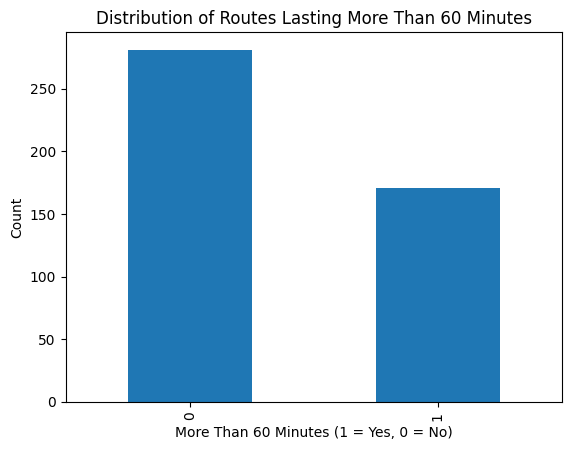

In [ ]:
#Answer 3:
# Create a binary label indicating whether the time spent is greater than 60 minutes
data_train['MoreThan60Minutes'] = (data_train['Time Spent'] > 60).astype(int)

# Check the distribution
print(data_train['MoreThan60Minutes'].value_counts())

# Visualize the distribution
import matplotlib.pyplot as plt
data_train['MoreThan60Minutes'].value_counts().plot(kind='bar')
plt.title('Distribution of Routes Lasting More Than 60 Minutes')
plt.xlabel('More Than 60 Minutes (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

In [ ]:
#Answer 4:
# Create a binary label indicating whether time spent is greater than 60 minutes
data_train['MoreThan60Minutes'] = (data_train['Time Spent'] > 60).astype(int)

# Define feature matrix and target variable
X = data_train[['Routes Completed', '# of Adult Volunteers', '# of Youth Volunteers', 'Doors in Route']]
y = data_train['MoreThan60Minutes']  # Now y is a binary classification label

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Answer 5:
from sklearn.metrics import classification_report

# Assuming we already have predictions (e.g., `y_pred_class` for classification)
print(classification_report(y_test, y_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.73      0.83      0.77        52
           1       0.72      0.59      0.65        39

    accuracy                           0.73        91
   macro avg       0.72      0.71      0.71        91
weighted avg       0.72      0.73      0.72        91



6. **Reflection and Recommendations**
   - Reflect on the model’s performance:
     - Were the predictions close to the actual results?
     - Were there any specific routes or wards where the model was more accurate or less accurate?
   - Provide recommendations for improving the model. Consider adjustments such as feature engineering, different model architectures, or new data that could be incorporated to improve accuracy in future predictions.

7. **Submission**
   - Submit your updated notebook with the following:
     - Model training and testing code.
     - Analysis of the model’s performance.
     - A short reflection (1-2 paragraphs) on the accuracy of the predictions and suggestions for improving the model.

---



*Answer 6:*
#Reflection on Model's Performance:#

* The performance of the models varied significantly across different metrics. For predicting the number of routes per ward, Random Forest performed the best with an R² of 0.78, while for predicting the number of routes per stake, Decision Tree and Gradient Boosting both had similar R² values of around 0.87. This suggests that these models are better suited for capturing trends in route numbers compared to K-Nearest Neighbors (KNN), which showed lower R² values.

* In predicting the number of donation bags collected per route, all models demonstrated negative R² values, indicating poor performance. This highlights that the models struggle to capture the complexity of the data in predicting donation bags. Furthermore, in the classification task, Random Forest performed better with an accuracy of 0.76, compared to Decision Tree and KNN.

* Specific routes or wards were found to have different prediction accuracies. For instance, Random Forest had higher accuracy in predicting the number of routes per ward and per stake, while the predictions of KNN were the least reliable. In predicting the number of donation bags collected per route, no model was particularly accurate, which points to potential data quality or feature-related issues.

#Recommendations for Improvement:#

*Feature Engineering:* Additional features such as volunteer experience, route difficulty, or demographic information could be introduced to improve the models' accuracy. This could help the models better understand the factors influencing the number of donation bags collected.

*Model Architecture:* Consider using more sophisticated models like Gradient Boosting Machines with fine-tuning of hyperparameters. Moreover, deep learning models such as neural networks could potentially perform better in capturing the complex relationships between the features.

*Address Data Imbalance:* The classification tasks showed data imbalance, as evident in the class distribution graphs. Using methods like SMOTE to oversample the minority class or undersampling the majority class could help balance the data, improving classification performance.

*Additional Data:* Incorporating external data such as weather conditions, population density of neighborhoods, or prior years' donation trends may provide additional context for the models to make better predictions.

*Regularization:* To prevent overfitting in the models, adding regularization techniques such as Ridge or Lasso could help reduce the model’s complexity, especially for the poorly performing models like Decision Tree and Random Forest in the donation bag prediction.

### Group 1: Year-on-Year Comparison (2023 vs 2024)
**Focus:** Perform a year-on-year comparison between the 2023 and 2024 food drives, analyzing donations, volunteer participation, and route completion times.  
**ML Task:** Comparative Analysis  
**Objective:** Build a model that predicts how donation predictions from 2023 align with 2024.

### Group 2: Geospatial Analysis of Neighborhood and Route Data
**Focus:** Conduct a geospatial analysis using neighborhood and route data, exploring areas contributing the most/least.  
**ML Task:** Geospatial Donation Prediction  
**Objective:** Develop a model to identify which neighborhoods are likely to contribute the most/least donations based on geospatial and demographic features.  
**Approach:** Apply geospatial clustering algorithms (e.g., K-means) to explore patterns between donation volumes and geographic or property value data.

### Group 3: Volunteer Allocation and Efficiency
**Focus:** Analyze how volunteer allocation impacted route completion times and donation volumes.  
**ML Task:** Volunteer Efficiency Modeling  
**Objective:** Predict the optimal number of volunteers needed for each route to maximize efficiency and donations collected.  
**Approach:** Explore the relationship between volunteer numbers, time taken, and donation volumes. Run the ML model with and without volunteer data. Determine if the model performs better or worse.

### Group 4: In-Depth Analysis of Belmead Ward
**Focus:** Conduct a detailed analysis of the Belmead Ward, comparing it with other wards in terms of donations, volunteer participation, and route efficiency.  
**ML Task:** Route Efficiency and Performance Modeling  
**Objective:** Build a model to predict which routes in Belmead Ward are most efficient and why, focusing on factors like route length, number of homes, and volunteer numbers.  
**Approach:** Use clustering techniques (e.g., K-means) and decision trees to categorize routes and predict efficiency based on historical data.

### Group 5: Property Assessment Data Correlation
**Focus:** Investigate the correlation between property values and donation volumes using the property assessment data alongside donation data.  
**ML Task:** Correlation and Impact Analysis  
**Objective:** Develop a model that predicts donation volumes based on property values in different neighborhoods.  
**Approach:** Bin routes per neighborhood. Run the ML model with and without property assessment values. Evaluate if the model performs better or worse.

### Group 6: Predictive Modeling Insights
**Focus:** Present predictive modeling results on donation volumes or time spent per route.  
**ML Task:** Time-to-Completion and Donation Prediction  
**Objective:** Predict how long it will take to complete each route and the expected donation volume for future drives.

### Group 7: Sentiment Analysis of Comments
**Focus:** Use sentiment analysis to evaluate volunteer comments and explore patterns across different wards.  
**ML Task:** Sentiment Classification and Correlation Analysis  
**Objective:** Build a model that classifies volunteer comments into positive, neutral, or negative categories, identifying correlations with donation success in each ward.


### Deliverables:
1. **Updated ML Notebook** with 2023 data as training and 2024 data as test data.
2. **Performance Metrics** comparing the model’s predictions to actual 2024 results.
3. **Reflection** on model accuracy and suggestions for improvement.